Se importan las liberias a utilizar 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

Se importa el archivo xlsx que se va a utilizar 

In [61]:
info_satisfaccion = pd.read_excel("info_satisfaccion_trabajo.xlsx")

In [56]:
info_satisfaccion.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Información del dataset

In [57]:
info_satisfaccion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Se puede observar que no hay nigun valor nulo o faltante en el dataset

In [32]:
info_satisfaccion.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Se observa que no existe nigun valo duplicado en el dataset

In [6]:
info_satisfaccion.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

Se empieza analizar la variable a predecir, la columna "JobSatisfaction"

Informacion de la variable a predecir

In [33]:
info_satisfaccion["JobSatisfaction"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1470 entries, 0 to 1469
Series name: JobSatisfaction
Non-Null Count  Dtype
--------------  -----
1470 non-null   int64
dtypes: int64(1)
memory usage: 11.6 KB


Se puede obseravr que la variable esta compuesta por 4 subgrupos, en donde podemos observar la cantidad de cada uno de los subgrupos.

In [34]:
info_satisfaccion["JobSatisfaction"].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

Antes de realizar los modelos de machine learning, se realizara un pequeño EDA (Analisis exploratorio de datos), para poder entender un poco la variable de interes y su relacion con las demas variables

Grafica de barras de la columna "JobSatisfaction"

<AxesSubplot: >

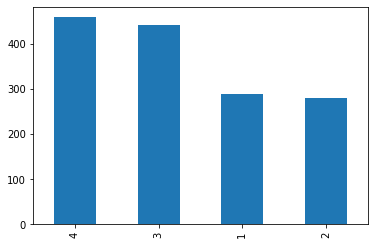

In [35]:
info_satisfaccion["JobSatisfaction"].value_counts().plot(kind="bar")

Valores estadisticos de la columna a predecir

Donde el promedio de la satisfaccion en el trabajo es iguala 2.72

In [36]:
info_satisfaccion["JobSatisfaction"].describe()

count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

Se puede observar que el valor que mas se repite segun la satisfaccion laboral es de 4. Entendiendose que si 4 es el mayor puntaje para la satisfaccion laboral, los empleados se encuentran mayormente satisfechos.

In [37]:
info_satisfaccion["JobSatisfaction"].mode()[0]

4

Se observa que la columna Travel_Rarely es la de mayor satisfaccion, por lo que se podria concluir que los viajes no afectan directamente en la satisfacción del empleado.

In [38]:
display(pd.crosstab(index=info_satisfaccion['JobSatisfaction'],
            columns=info_satisfaccion['BusinessTravel'], margins=True))

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely,All
JobSatisfaction,,,,
1,23,51,215,289
2,29,49,202,280
3,54,84,304,442
4,44,93,322,459
All,150,277,1043,1470


Podemos observar que el departamento con mayor satisfaccion laboral es el departamento de "Research & Development"

Podemos observar que el departamento con menor satisfación laboral es el departamento "Human Resources"

In [39]:
display(pd.crosstab(index=info_satisfaccion['JobSatisfaction'],
            columns=info_satisfaccion['Department'], margins=True))

Department,Human Resources,Research & Development,Sales,All
JobSatisfaction,,,,
1,11,192,86,289
2,20,174,86,280
3,15,300,127,442
4,17,295,147,459
All,63,961,446,1470


Se puede observar que los hombres tienen mas satisfacción que las mujeres en el trabajo

In [14]:
display(pd.crosstab(index=info_satisfaccion['JobSatisfaction'],
            columns=info_satisfaccion['Gender'], margins=True))

Gender,Female,Male,All
JobSatisfaction,,,
1,119,170,289
2,118,162,280
3,181,261,442
4,170,289,459
All,588,882,1470


Se puede observar que las personas de Sales Executive son las de mayor satisfaccion laboral, mientras que las personas de Human Resources son las de menor satisfaccion laboral

In [15]:
display(pd.crosstab(index=info_satisfaccion['JobSatisfaction'],
            columns=info_satisfaccion['JobRole'], margins=True))

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,All
JobSatisfaction,,,,,,,,,,
1,26,10,56,21,26,15,54,69,12,289
2,19,16,48,21,32,16,53,54,21,280
3,43,13,75,27,49,27,90,91,27,442
4,43,13,80,33,38,22,95,112,23,459
All,131,52,259,102,145,80,292,326,83,1470


Nos quedamos con las variables que consideramos importantes

In [62]:
info_satisfaccion = info_satisfaccion[["DailyRate", "DistanceFromHome", "EnvironmentSatisfaction", "JobInvolvement", "JobRole", "PercentSalaryHike","PerformanceRating" ,"MonthlyIncome", "NumCompaniesWorked", "RelationshipSatisfaction","YearsAtCompany","WorkLifeBalance", "YearsInCurrentRole", "YearsSinceLastPromotion","YearsWithCurrManager", "JobSatisfaction" ]]

Correlación de los datos

In [63]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10220\1388907352.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = info_satisfaccion.corr()


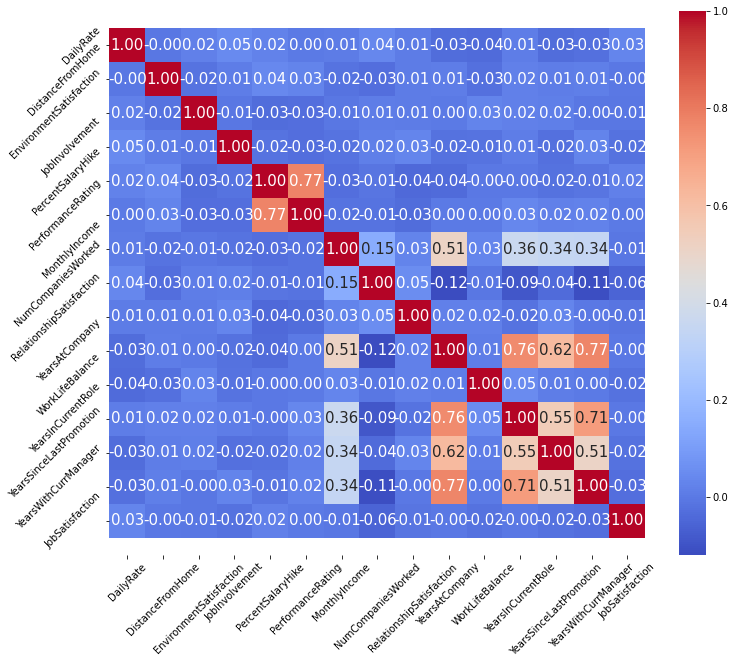

In [64]:
corr = info_satisfaccion.corr()
plot_corre_heatmap(corr)

Al observar la correlacion de los datos, nos damos cuenta de las variables que mas estan relacionadas a nuestra variable a predecir, por lo que definimos nuevamente las variables que vamos a utilizar.  

In [65]:
info_satisfaccion = info_satisfaccion[["YearsWithCurrManager", "RelationshipSatisfaction", "DailyRate", "YearsSinceLastPromotion", "JobSatisfaction" ]]

Modelo de regresión logistica

In [86]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


Definimos la varible y como la etiqueta que queremos predecir, en donde se hace la separacion de los datos 

In [87]:
X = info_satisfaccion.drop(labels = ["JobSatisfaction"], axis = 1) 
y = info_satisfaccion['JobSatisfaction'] # Etiqueta a predecir

Se definen las variblaes ha utilizar, usando X y Y definidos anteriormente con el dataset

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Se entrena el modelo de regresion logistica con los valores definidos anteriormente

In [89]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [90]:
y_pred

array([4, 4, 4, 3, 4, 4, 4, 4, 1, 4, 3, 4, 4, 4, 3, 3, 4, 3, 4, 4, 4, 4,
       4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 1, 3, 4, 4,
       4, 4, 4, 4, 4, 3, 3, 3, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 1, 3, 4, 4,
       3, 4, 4, 4, 3, 4, 4, 3, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 3, 4, 3, 3, 4, 3, 3, 3, 4, 3, 4, 3,
       3, 4, 4, 4, 4, 4, 4, 3, 3, 4, 3, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 3,
       3, 3, 3, 3, 4, 4, 4, 3, 4, 3, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 3,
       4, 4, 3, 4, 4, 3, 1, 3, 4, 4, 4, 3, 4, 3, 4, 3, 4, 4, 4, 3, 4, 4,
       4, 4, 3, 4, 3, 3, 3, 3, 3, 4, 3, 4, 3, 4, 4, 3, 4, 4, 3, 4, 4, 3,
       3, 4, 3, 4, 4, 4, 3, 3, 4, 4, 4, 4, 3, 3, 4, 3, 4, 3, 4, 4, 4, 3,
       3, 4, 4, 4, 4, 3, 4, 3, 3, 3, 4, 4, 4, 4, 3, 3, 4, 3, 3, 4, 4, 3,
       3, 4, 4, 4, 3, 3, 3, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 3, 4, 4,
       4, 3, 4, 3, 3, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 3, 3, 3, 3, 4, 4, 4,
       3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 3, 4,

Matriz de confusión

In [91]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 1,  0, 33, 46],
       [ 0,  0, 16, 44],
       [ 2,  0, 44, 67],
       [ 1,  0, 37, 77]], dtype=int64)

Text(0.5, 257.44, 'Etiqueta de prediccion')

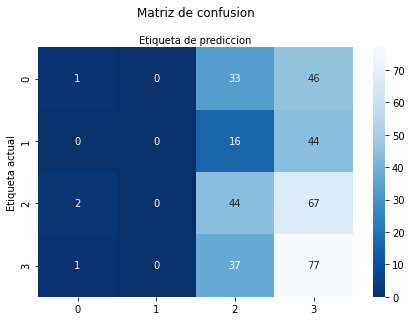

In [92]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap= "Blues_r", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriz de confusion", y= 1.1)
plt.ylabel("Etiqueta actual")
plt.xlabel("Etiqueta de prediccion")

Reporte de clasificacion

In [93]:
print("Exactitud ", metrics.accuracy_score(y_test, y_pred))

Exactitud  0.33152173913043476


In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.25      0.01      0.02        80
           2       0.00      0.00      0.00        60
           3       0.34      0.39      0.36       113
           4       0.33      0.67      0.44       115

    accuracy                           0.33       368
   macro avg       0.23      0.27      0.21       368
weighted avg       0.26      0.33      0.25       368



c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Arbol de decisión

Se definen la variable a predecir.
X como la variable predictora
y como la variable a predecir

In [74]:
X = info_satisfaccion.drop(labels = ["JobSatisfaction"], axis = 1) 
y = info_satisfaccion['JobSatisfaction'] # Etiqueta a predecir

In [75]:
X.head()

,YearsWithCurrManager,RelationshipSatisfaction,DailyRate,YearsSinceLastPromotion
0,5,1,1102,0
1,7,4,279,1
2,0,2,1373,0
3,0,3,1392,3
4,2,4,591,2


In [76]:
y.tail()

1465    4
1466    1
1467    2
1468    2
1469    3
Name: JobSatisfaction, dtype: int64

In [77]:
from sklearn.tree import DecisionTreeClassifier

# Instanciamos un objeto de la clase DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 30, random_state = 42)

Entrenamos el modelo

In [78]:
clf.fit(X.values,y.values)

DecisionTreeClassifier(max_depth=30, random_state=42)

In [79]:
print(clf.classes_)
print(clf.n_classes_)
print(clf.max_features_)
print(clf.feature_importances_)

[1 2 3 4]
4
4
[0.18998103 0.14654576 0.51622984 0.14724337]


Se realiza la predicción del modelo

In [80]:
y_pred = clf.predict(X.values)
print(y_pred)

[4 2 3 ... 2 2 3]


Evaluamos nuestro modelo de clasificación

In [82]:
from sklearn.metrics import accuracy_score

print(f"Accuracy_score: {round(accuracy_score(y,y_pred),4)*100}%")

Accuracy_score: 99.18%


Ploteamos la importancia de los atributos elegidos a la hora de hacer la predicción.

Se puede observar que la columna que mas predice la satisfacción laboral es la columna de la tarifa diaria.

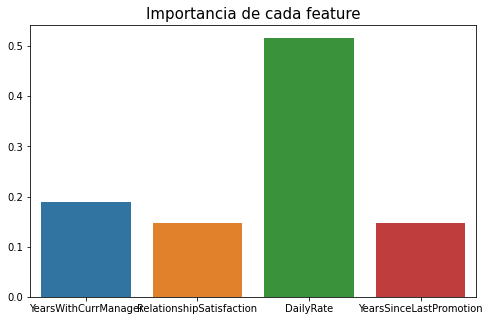

In [95]:
plt.figure(figsize = (8,5))

importances = clf.feature_importances_
columns = X.columns
sns.barplot(x = columns, y = importances)
plt.title('Importancia de cada feature', fontsize = 15)
plt.show()